In [1]:
import numpy as np
import os
import pandas as pd
import json
from sklearn.manifold import TSNE
import seaborn as sns
import inflect
import matplotlib.pyplot as plt
import pickle
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("./spam.csv")
uniqueValues = df["label"].unique()
label =  np.array(df["label"])
data = np.array(df["data"])

In [ ]:
ham = []
spam = []
label1 = []
data1 = []
for i in range(len(label)):
    try:
        if label[i] == "ham"or label[i].split('"') =="ham":
            label1.append("ham")
            data1.append(data[i])
        elif label[i] == "spam":
            data1.append(data[i])
            label1.append("spam")
    except:
        print(label[i])
        

In [ ]:
import inflect
p = inflect.engine()
p.number_to_words("hgd")

# Started from here

In [ ]:
sms = pd.read_csv("./spam.csv", encoding='latin-1')
sms.dropna(how="any", inplace=True, axis=1)
sms.columns = ['label', 'message']
sms.head()

In [ ]:
# Only for mail spam
f = open("./spam_mail.csv","r")
g = f.read().split("\n")[:-1]

In [ ]:
data = []
label = []
for i in g[1:]:
    h = i.split(",")
    data.append(''.join(h[:-1]))
    try:
        label.append(int(h[-1]))
    except:
        print(h[-1])

In [ ]:
sms = pd.DataFrame(list(zip(data, label)),columns=["message","label"])

In [ ]:
sms.describe()

In [ ]:
sms.groupby('label').describe()

In [ ]:
sms['label_num'] = sms.label.map({'ham':0, 'spam':1})
sms.head()

In [ ]:
sms['message_len'] = sms.message.apply(len)
sms.head()

In [ ]:
sms[sms.label=='ham'].describe()

In [ ]:
import string
from nltk.corpus import stopwords
p = inflect.engine()
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
#     STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    # Check characters to see if they are in punctuation
    list_remove = string.punctuation
    list_remove.replace('.', '')
    list_remove.replace('?','')
    list_remove.replace(",",'')
    nopunc = [char for char in mess if char not in list_remove]
    words = []
    nopunc = ''.join(nopunc)
    for i in nopunc.split(" "):
        if i.isnumeric():
            words.append(p.number_to_words(i).lower())
            continue
        nopunc_check = [char.isnumeric() for char in i]
        if True in nopunc_check:
            pass
        else:
            words.append(i.lower())
        
#     # Join the characters again to form the string.
    nopunc = ' '.join(words)
    # Now just remove any stopwords
    return nopunc

In [ ]:

from collections import Counter
sms['clean_msg'] = sms.message.apply(text_process)
words = sms[sms.label=='ham'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
ham_words = Counter()

for msg in words:
    ham_words.update(msg)
    
print(ham_words.most_common(50))
X = sms.clean_msg
y = sms.label


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
y_train = y_train.to_list()
y_test = y_test.to_list()

In [ ]:
import pickle
outfile = open("train_label_sms_spam.txt",'wb')
pickle.dump(y_train,outfile)
outfile.close()
outfile = open("test_label_sms_spam.txt",'wb')
pickle.dump(y_test,outfile)
outfile.close()

In [ ]:
f = open("spam_train.txt","w")
for i in X_train:
    f = open("spam_train.txt","a")
    f.write(i)
    f.write("\n")
    f.close()
f = open("spam_test.txt","w")
for i in X_test:
    f = open("spam_test.txt","a")
    f.write(i)
    f.write("\n")
    f.close()

# To make model 

In [ ]:
def prepare_data(X_train,y_train,spam,non_spam,spam_file,non_spam_file):
    
    # print(len(X_train))
    f = open(non_spam_file,"r")
    g = f.read().split("\n")
    for i in g[:non_spam]:
        if i =="" or i == '' or i=="\n":
            continue
        X_train.append(i)
        y_train.append(0)
    f = open(spam_file,"r")
    g = f.read().split("\n")[:spam]
    for i in g:
        if i =="" or i == '' or i=="\n":
            continue
        X_train.append(i)
        y_train.append(1)
    count = 0 
    for i in y_train:
        if i ==0:
            count+=1
    print("Non spam data points: ",count)
    print("Spam data points : ",len(y_train)-count)
    return X_train,y_train

In [ ]:
f = open("../sa_emotions/sa_emotion_train.txt","r")
X_train =f.read().split("\n")[:-1]

In [ ]:
y_train = pickle.load(open("../train_label_imdb.pickle","rb"))

In [ ]:
y_train = [1 for i in range(len(X_train))]

In [ ]:
acc = []
# data_points = [0,100,500, 700,1000,1500,2000,3000,4000]
spam = 0
# for i in data_points:
X_train = []
f = open("../spam_train.txt","r")
g = f.read().split("\n")
for j in g:
    if j =="" or j == '' or j=="\n":
        continue
    X_train.append(j)

In [ ]:
len(X_train),len(y_train)

In [ ]:
a = []
for i in range(len(X_train)):
    if y_train[i] ==1:
        a.append(X_train[i])

In [ ]:
import pandas as pd

dict = {'question_text':X_train1 , 'target': y_train1}  
leaderboard_max = pd.DataFrame(dict) 
leaderboard_max.to_csv('testing_vector_imbd_plot.csv') 

In [ ]:
dict = {'question_text':X_train , 'target': y_train}  
leaderboard_max = pd.DataFrame(dict) 
leaderboard_max.to_csv('train.csv') 

In [ ]:
import torch
from torchtext import data

SEED = 1234
import pandas as pd
import numpy as np
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchtext

import nltk

import random
from sklearn.metrics import classification_report


In [ ]:
main_df = pd.read_csv("./train.csv")
print(main_df.shape)
main_df = main_df.sample(n=main_df.shape[0])
main_df = main_df[["question_text", "target"]]
main_df.head()

In [ ]:
train_0 = main_df.loc[main_df.target == 0, :]
train_1 = main_df.loc[main_df.target == 1, :]
train_2 = main_df.loc[main_df.target == 2, :]
train_3 = main_df.loc[main_df.target == 3, :]
train_4 = main_df.loc[main_df.target == 4, :]
train_5 = main_df.loc[main_df.target == 5, :]
train_6 = main_df.loc[main_df.target == 6, :]
train_7 = main_df.loc[main_df.target == 7, :]
train_8 = main_df.loc[main_df.target == 8, :]
train_9 = main_df.loc[main_df.target == 9, :]
train_10 = main_df.loc[main_df.target == 10, :]
train_11 = main_df.loc[main_df.target == 11, :]
train_12 = main_df.loc[main_df.target == 12, :]

In [ ]:
main_df = pd.read_csv("./testing_vector_imbd_plot.csv")
print(main_df.shape)
main_df = main_df.sample(n=main_df.shape[0])
main_df = main_df[["question_text", "target"]]
main_df.head()

In [ ]:
test_0 = main_df.loc[main_df.target == 0, :]
test_1 = main_df.loc[main_df.target == 1, :]
test_2 = main_df.loc[main_df.target == 2, :]
test_3 = main_df.loc[main_df.target == 3, :]
test_4 = main_df.loc[main_df.target == 4, :]
test_5 = main_df.loc[main_df.target == 5, :]
test_6 = main_df.loc[main_df.target == 6, :]
test_7 = main_df.loc[main_df.target == 7, :]
test_8 = main_df.loc[main_df.target == 8, :]
test_9 = main_df.loc[main_df.target == 9, :]
test_10 = main_df.loc[main_df.target == 10, :]
test_11 = main_df.loc[main_df.target == 11, :]
test_12 = main_df.loc[main_df.target == 12, :]

In [ ]:
def tokenizer(text):
    return [tok for tok in nltk.word_tokenize(text)]

In [ ]:

train = pd.concat([train_0, train_1,train_2, train_3,train_4, train_5,train_6, train_7,train_8, train_9,train_10, train_11,train_12], axis=0)
test = pd.concat([test_0, test_1,test_2, test_3,test_4, test_5,test_6, test_7,test_8, test_9,test_10, test_11,test_12], axis=0)
train.to_csv("torchtext_data/train.csv", index=False)
test.to_csv("torchtext_data/test.csv", index=False)
import spacy
spacy_en = spacy.load('en')
# nltk.download('punkt')

In [ ]:
# tokenizer = "spacy" uses spacy's tokenizer
TEXT = data.Field(sequential=True, tokenize="spacy")
LABEL = data.LabelField(dtype=torch.long, sequential=False)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
train_data, test_data = data.TabularDataset.splits(
    path="torchtext_data/", train="train.csv", test="test.csv",format="csv", skip_header=True, 
    fields=[('Text', TEXT), ('Label', LABEL)]
)

In [ ]:
TEXT.build_vocab(train_data, vectors = "glove.6B.300d", 
                 max_size=100000, min_freq=10)
LABEL.build_vocab(train_data)

In [ ]:
df = pd.read_csv("./torchtext_data/train.csv")
text_data = df["question_text"]
text_main = []
for i in text_data:
    try:
        
        text_main.append(nltk.word_tokenize(i))
    except:
        text_main.append([""])
pretrained_embeddings = TEXT.vocab.vectors

In [ ]:
X1 = []
for i in range(len(text_main)):
    temp = []
    for j in text_main[i]:
        try:
            IDX = TEXT.vocab.stoi[j]
        
            temp.append(pretrained_embeddings[IDX].numpy())
        except:
            temp.append(np.zero(300))
    X1.append(np.mean(np.array(temp),axis=0))

In [ ]:
df = pd.read_csv("./torchtext_data/test.csv")
text_data = np.array(df["question_text"])
text_main = []
for i in text_data:
    try:
        text_main.append(nltk.word_tokenize(i))
    except:
        text_main.append([""])


In [ ]:
X2 = []
for i in range(len(text_main)):
    temp = []
    for j in text_main[i]:
        try:
            IDX = TEXT.vocab.stoi[j]
        
            temp.append(pretrained_embeddings[IDX].numpy())
        except:
            temp.append(np.zero(300))
    X2.append(np.mean(np.array(temp),axis=0))

In [ ]:
vect = TfidfVectorizer()
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_train1)
X1 = X_train_dtm.toarray()
X2 = X_test_dtm.toarray()

In [ ]:
dict = {}
dict["0"] = "EM"
dict["1"] = "SD"
dict["2"] = "EN"
dict["3"] = "NE"
dict["4"] = "WR"
dict["5"] = "SR"
dict["6"] = "LV"
dict["7"] = "FN"
dict["8"] = "HT"
dict["9"] = "HP"
dict["10"] = "BR"
dict["11"] = "RL"
dict["12"] = "AN"

dict1 = {}
dict1["0"] = "EM_augment"
dict1["1"] = "SD_augment"
dict1["2"] = "EN_augment"
dict1["3"] = "NE_augment"
dict1["4"] = "WR_augment"
dict1["5"] = "SR_augment"
dict1["6"] = "LV_augment"
dict1["7"] = "FN_augment"
dict1["8"] = "HT_augment"
dict1["9"] = "HP_augment"
dict1["10"] = "BR_augment"
dict1["11"] = "RL_augment"
dict1["12"] = "AN_augment"

In [ ]:
y1 = []
for i in y_train:
    y1.append(dict[str(i)])
y2 = []
for i in y_train1:
    y2.append(dict1[str(i)])

In [ ]:
import pandas as pd
tsne_plot(X1,X2,y1,y2,"TSNE plot for real and augmented data ",13)

In [ ]:
tsne_plot(X_train[:3000],label_main[:4300],"TSNE plot for Augmented data with real data",2)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [ ]:
y_train =np.array(sms["label"])

In [ ]:
count = 0 
for i in y_train:
    if i ==0:
        count+=1
print("Non spam data points: ",count)
print("Spam data points : ",len(y_train)-count)

In [ ]:
acc = []
data_points = [0,100,500, 700,1000,1500,2000,3000,4000]
spam = 0
for i in data_points:
    X_train = []
    f = open("../spam_train.txt","r")
    g = f.read().split("\n")
    for j in g:
        if j =="" or j == '' or j=="\n":
            continue
        X_train.append(j)
    y_train = pickle.load(open("../train_label_sms_spam.pkl","rb"))
    X_train,y_train = prepare_data(X_train,y_train,0,0,"./write_file.txt1","./write_file.txt0")
    

    # instantiate the vectorizer
    vect = CountVectorizer()
    vect.fit(X_train)
    X_train_dtm = vect.transform(X_train)
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    
    tfidf_transformer = TfidfTransformer()
    tfidf_transformer.fit(X_train_dtm)
    tfidf_transformer.transform(X_train_dtm)

    nb = MultinomialNB()
    # train the model using X_train_dtm (timing it with an IPython "magic command")
    nb.fit(X_train_dtm, y_train)
    # make class predictions for X_test_dtm
    y_pred_class = nb.predict(X_test_dtm)
    # calculate accuracy of class predictions

    acc.append(metrics.accuracy_score(y_test, y_pred_class))
    

In [ ]:
print("Maximum Accuracy : ",max(acc))

In [ ]:
plt.plot(data_points,acc)
plt.title("Accuracy score with varying spam augmented data ")
plt.ylabel("Accuracy Score")
plt.xlabel("Data points added as augmenting spam and fixed non-spam : " + str(spam))
plt.show()

In [ ]:
sms.to_csv("./spam_mail_preprocess.csv")

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(X_train)

# LSTM based classifier


In [1]:
from flair.embeddings import WordEmbeddings
from flair.data import Sentence, Token
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
import random
from keras.callbacks import EarlyStopping
%matplotlib inline
warnings.filterwarnings("ignore")
hindi_wikipedia_embeddings = WordEmbeddings('hi')

/home/suraj18025/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/suraj18025/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/suraj18025/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/suraj18025/anaconda3/lib/python3.7/site-packages/tensorflow/pyth

2020-05-28 14:21:33,804 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings-v0.3/en-fasttext-news-300d-1M.vectors.npy not found in cache, downloading to /tmp/tmp72jj0e2a


 45%|████▍     | 538459136/1200000128 [00:37<00:46, 14372264.54B/s]

KeyboardInterrupt: 

In [161]:
df = pd.read_csv("./hindi_sentiment_main.csv")

In [28]:
def enumerate_augment(num_aug):
    acc_score = []
    for num in num_aug:
        y_train = pickle.load(open("../Hindi_Movie_Sentiment/train_label_bengali.pkl","rb"))
        f = open("../Hindi_Movie_Sentiment/bengali_sentiment.txt","r")
        X_train =f.read().split("\n")
        f = open("../gan_modified/exp_mult_bengali1/write_file.txt0","r")
        X_train1 =f.read().split("\n")[:-1]
        X_train3 = []
        for i in X_train1:
            if i=="" or i=='' or i=="\n" or i==" "or i==' ':
                pass
            else:
                X_train3.append(i)
        X_train1 = copy.deepcopy(X_train3)
        random.shuffle(X_train1)
        X_train1 = X_train1[:num]

        # f = open("../gan_modified/exp_mult_spam/write_file.txt0","r")
        # for i in f.read().split("\n")[:-1]:
        #     X_train1.append(i)
        y_train1 = [0 for i in range(len(X_train1))]

        f = open("../gan_modified/exp_mult_bengali1/write_file.txt1","r")
        x1 = f.read().split("\n")[:-1]
        X_train3 = []
        for i in x1:
            if i=="" or i=='' or i=="\n" or i==" "or i==' ':
                pass
            else:
                X_train3.append(i)
        x1 = copy.deepcopy(X_train3)
        
        random.shuffle(x1)
        x1 = x1[:num]
        for i in x1:
            X_train1.append(i)
            y_train1.append(1)

        ind = [i for i in range(7000)]
        ind = random.sample(ind,len(ind))
        ind = ind[:6000]
        X_test = []
        y_test = []
        X_train2 = []
        y_train2 = []
        for i in range(7000):
            if i in ind:
                X_train2.append(X_train[i])
                y_train2.append(y_train[i])
            else:
                X_test.append(X_train[i])
                y_test.append(y_train[i])
        for i in range(len(X_train1)):
            X_train2.append(X_train1[i])
            y_train2.append(y_train1[i])
        embeddings_data = []
        embeddings_data_test = []
        for i in X_train2:
            sentence = Sentence(i)
            hindi_wikipedia_embeddings.embed(sentence)
            temp = []
            for token in sentence:
                temp.append(token.embedding.cpu().numpy())
            embeddings_data.append(np.mean(np.array(temp),axis=0))

        for i in X_test:
            sentence = Sentence(i)
            hindi_wikipedia_embeddings.embed(sentence)
            temp = []
            for token in sentence:
                temp.append(token.embedding.cpu().numpy())
            embeddings_data_test.append(np.mean(np.array(temp),axis=0))
        clf =  make_pipeline(StandardScaler(), GaussianNB())
        clf = clf.fit(embeddings_data,np.array(y_train2))
        acc_score.append(clf.score(embeddings_data_test,y_test))
    return acc_score

In [1]:
acc = enumerate_augment([0,100,500,800,1000,2000,3000,4000,5000,6000])

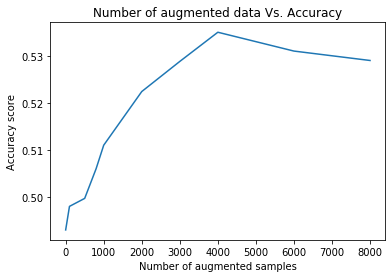

In [43]:
plt.plot([0,100,500,800,1000,2000,3000,4000,6000,8000],acc)
plt.xlabel("Number of augmented samples")
plt.ylabel("Accuracy score")
plt.title("Number of augmented data Vs. Accuracy")
plt.show()

In [81]:
def augment_data_retrieve(location,n):
    f = open(location,"r")
    g = f.read().split("\n")
    random.sample(g,len(g))
    return g[:n]

In [82]:
# 'conflict': 200,
#  'neutral': 598,
#  'positive': 823,
#  'negative': 530,

In [87]:
clf =  make_pipeline(StandardScaler(), GaussianNB())
clf = clf.fit(embeddings_data,np.array(y_train2))
print("Testing accuracy : ",clf.score(embeddings_data_test,y_test))

In [13]:

clf = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel="rbf"))

In [142]:
clf = clf.fit(embeddings_data,train_label)
print("Testing accuracy : ",clf.score(embeddings_data_test,test_label))

Testing accuracy :  0.5298013245033113


In [144]:
from sklearn.ensemble import RandomForestClassifier

In [155]:
clf = RandomForestClassifier(max_depth=15
                             , random_state=0)
clf = clf.fit(embeddings_data,train_label)
print("Testing accuracy : ",clf.score(embeddings_data_test,test_label))

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils.random import sample_without_replacement
import random
from sklearn.decomposition import PCA
def tsne_plot(dataset_main,dataset_main1,label_main,label_main1,title,classes):
    #TSNE Plot for glass dataset
    tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=400)
 
    tsne_results = tsne.fit_transform(dataset_main)
    tsne_results1 = tsne.fit_transform(dataset_main1)
    df_subset = pd.DataFrame()
    df_subset['X'] = tsne_results[:,0]
    df_subset['y']=label_main
    df_subset['Y'] = tsne_results[:,1]
    plt.figure(figsize=(6,4))
    plt.title(title)
    sns.scatterplot(
        x="X", y="Y",
        hue="y",
        palette=sns.color_palette("hls", classes),
        data=df_subset,
        legend="brief",
        alpha=1.0,
        
    )
   
    df_subset = pd.DataFrame()
    df_subset['X'] = tsne_results1[:,0]
    df_subset['y']=label_main1
    df_subset['Y'] = tsne_results1[:,1]
#     plt.figure(figsize=(6,4))
#     plt.title(title)
    sns.scatterplot(
        x="X", y="Y",
        hue="y",
        palette=sns.hls_palette(classes, l=.3, s=.8),
        data=df_subset,
        legend="brief",
        alpha=1.0,
       
    )
    
    
    
def pca_plot(dataset_main,dataset_main1,label_main,label_main1,title1,title2,classes):
    #TSNE Plot for glass dataset
    tsne = PCA(n_components=2)
    tsne_results = tsne.fit_transform(dataset_main)
    tsne_results1 = tsne.transform(dataset_main1)
    df_subset = pd.DataFrame()
    df_subset['X'] = tsne_results[:,0]
    df_subset['y']=label_main
    df_subset['Y'] = tsne_results[:,1]
    plt.figure(figsize=(6,4))
    plt.title(title1)
    sns.scatterplot(
        x="X", y="Y",
        hue="y",
        palette=sns.color_palette("hls", classes),
        data=df_subset,
        legend="brief",
        alpha=1.0,
        
    )
    plt.figure(figsize=(6,4))
    plt.title(title2)
    df_subset = pd.DataFrame()
    df_subset['X'] = tsne_results1[:,0]
    df_subset['y']=label_main1
    df_subset['Y'] = tsne_results1[:,1]
#     plt.figure(figsize=(6,4))
#     plt.title(title)
    sns.scatterplot(
        x="X", y="Y",
        hue="y",
        palette=sns.hls_palette(classes, l=.3, s=.8),
        data=df_subset,
        legend="brief",
        alpha=1.0,
       
    )

In [120]:
dataset_main = embeddings_data[:2000]
dataset_main1 = embeddings_data[2000:]
label_main = train_label[:2000]
label_main1 = train_label[2000:]

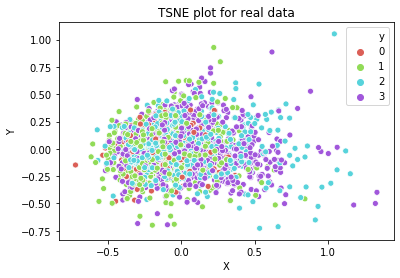

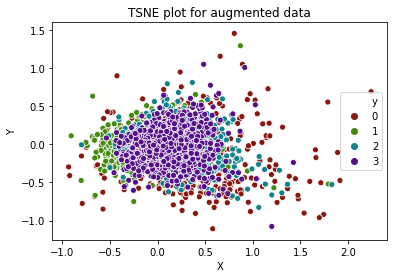

In [122]:
pca_plot(dataset_main,dataset_main1,label_main,label_main1,"TSNE plot for real data","TSNE plot for augmented data",4)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [ ]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [ ]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [ ]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=40,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

In [ ]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)
accr = model.evaluate(test_sequences_matrix,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))